## Cricket analytics

The data has been taken from statsguru.

In [250]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [251]:
#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [252]:
df = pd.read_csv('ODI_data.csv')

In [253]:
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df.shape

(171968, 28)

In [255]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [256]:
df = df[df['Innings Runs Scored Num'] != '-']

In [257]:
df = df.dropna(subset = ['Innings Runs Scored Num'])

In [258]:
# convert to datetime
df['Innings Date'] = pd.to_datetime(df['Innings Date']) 

In [259]:
df['year'] = df['Innings Date'].dt.year

In [260]:
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          object        
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             float64       
Innings Balls Faced              object        
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [261]:
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [262]:
cols_to_int = ['Innings Runs Scored Num','Innings Balls Faced','Innings Not Out Flag']
df[cols_to_int] = df[cols_to_int].astype('int')

In [263]:
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,RL Chase,18,18,34,1.0,0,23,0,0,78.26,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,SS Cottrell,17,17,23,1.0,0,18,2,1,94.44,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


### Ganguly's era --> 1992 - 2008
### Dhoni's era --> 2004 - 2018

In [264]:
df_Ganguly_era = df[(df.year >= 1992) & (df.year <= 2008)]
df_Dhoni_era = df[(df.year >= 2004) & (df.year <= 2018)]

### KPIs

* #### Runs per innings = total Runs / total Innings
* #### SR = total runs / total balls faced
* #### 100's = sum(100's)
* #### 50's = sum(50's)
* #### % of team runs = Player Runs / Team Runs
* #### Relative RPI = player RPI / RPI of other players
* #### Relative SR = player SR / SR of other players

In [265]:
def extract_name(df, col_name,sub):
    
    try:
        df['Indexes']= df[col_name].str.find(sub.title())
        name = df[df['Indexes']!=-1][col_name].unique()[0]
        
    except:
        name = 'player not found'
    
    return name

In [266]:
extract_name(df, 'Innings Player','Ganguly')

'SC Ganguly'

In [267]:
extract_name(df, 'Innings Player','dhoni')

'MS Dhoni'

In [268]:
# SC Ganguly
df_Ganguly = df_Ganguly_era[df_Ganguly_era['Innings Player'] == 'SC Ganguly']
df_not_Ganguly = df_Ganguly_era[df_Ganguly_era['Innings Player'] != 'SC Ganguly']

# MS Dhoni
df_Dhoni = df_Dhoni_era[df_Dhoni_era['Innings Player'] == 'MS Dhoni']
df_not_Dhoni = df_Dhoni_era[df_Dhoni_era['Innings Player'] != 'MS Dhoni']

##### 1. Runs per innings --> runs/matches

In [269]:
rpi_Ganguly = np.round(df_Ganguly['Innings Runs Scored Num'].sum()/len(df_Ganguly),2)
rpi_Ganguly

37.78

In [270]:
rpi_Dhoni = np.round(df_Dhoni['Innings Runs Scored Num'].sum()/len(df_Dhoni),2)
rpi_Dhoni

35.97

##### 2. Strike rate --> runs/balls

In [271]:
sr_Ganguly = np.round(100*df_Ganguly['Innings Runs Scored Num'].sum()/df_Ganguly['Innings Balls Faced'].sum(),2)
sr_Ganguly

73.65

In [272]:
sr_Dhoni = np.round(100*df_Dhoni['Innings Runs Scored Num'].sum()/df_Dhoni['Innings Balls Faced'].sum(),2)
sr_Dhoni

87.44

##### 3. No of 100's

In [273]:
df_Ganguly["100's"].sum()

22.0

In [274]:
df_Dhoni["100's"].sum()

9.0

##### 4. No of 50's

In [275]:
df_Ganguly["50's"].sum()

71.0

In [276]:
df_Dhoni["50's"].sum()

67.0

##### 5. % of team runs - Runs scored by player/Runs by team in player's era

In [277]:
# Runs scored by player

In [278]:
runs_Ganguly = df_Ganguly['Innings Runs Scored Num'].sum()
runs_Ganguly

11221

In [279]:
runs_Dhoni = df_Dhoni['Innings Runs Scored Num'].sum()
runs_Dhoni

9999

In [280]:
# Runs scored by team

In [281]:
runs_Ganguly_team = df_Ganguly_era[df_Ganguly_era['Country'] == 'India']['Innings Runs Scored Num'].sum()
runs_Ganguly_team

103487

In [282]:
runs_Dhoni_team = df_Dhoni_era[df_Dhoni_era['Country'] == 'India']['Innings Runs Scored Num'].sum()
runs_Dhoni_team

91713

In [283]:
# % of team runs

In [284]:
contrib_Ganguly = np.round(runs_Ganguly/runs_Ganguly_team*100,2)
contrib_Ganguly

10.84

In [285]:
contrib_Dhoni = np.round(runs_Dhoni/runs_Dhoni_team*100,2)
contrib_Dhoni

10.9

### Normalization: 

##### 5. Relative RPI - 

##### Ganguly

In [286]:
# RPI of Ganguly

rpi_Ganguly

37.78

In [287]:
# RPI of other players in Ganguly's era

rpi_not_Ganguly = df_not_Ganguly['Innings Runs Scored Num'].sum()/len(df_not_Ganguly)
rpi_not_Ganguly

22.654863276565123

In [288]:
# Relative RPI

rel_rpi_Ganguly = np.round(rpi_Ganguly/rpi_not_Ganguly,2)
rel_rpi_Ganguly

1.67

##### Dhoni

In [289]:
# RPI of other players in Dhoni's era

rpi_not_Dhoni = df_not_Dhoni['Innings Runs Scored Num'].sum()/len(df_not_Dhoni)
rpi_not_Dhoni

24.22197419820766

In [290]:
# Relative RPI

rel_rpi_Dhoni = np.round(rpi_Dhoni/rpi_not_Dhoni,2)
rel_rpi_Dhoni

1.49

##### 6. Relative SR - SR of player / SR of other players

* a = runs / balls for player
* b = runs / balls for other players
* a/b

In [291]:
def calculate_rel_sr(df, player_name):
    
    if player_name == 'SC Ganguly':
        df_era = df[(df.year >= 1992) & (df.year <= 2008)]
    elif player_name == 'MS Dhoni':
        df_era = df[(df.year >= 2004) & (df.year <= 2018)]
    
    df_player = df_era[df_era['Innings Player'] == player_name]
    df_others = df_era[df_era['Innings Player'] != player_name]

    sr = df_player['Innings Runs Scored Num'].sum()/df_player['Innings Balls Faced'].sum()
    sr_others = df_others['Innings Runs Scored Num'].sum()/df_others['Innings Balls Faced'].sum()
        
    rel_sr = np.round(sr/sr_others,2)
        
    return rel_sr

In [292]:
calculate_rel_sr(df, 'SC Ganguly')

1.01

In [293]:
calculate_rel_sr(df, 'MS Dhoni')

1.08

### Competition visualizations:

* Competition in terms of runs scored

In [294]:
def analyse_competition_runs(df, player_name, top_n = 10):
    
    if player_name == 'SC Ganguly':
        df_era = df[(df.year >= 1992) & (df.year <= 2008)]
    elif player_name == 'MS Dhoni':
        df_era = df[(df.year >= 2004) & (df.year <= 2018)]
    
    comp_runs = df_era.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(top_n)
    print('list of top 10 run getters :\n', comp_runs)
    
    comp_runs.plot(kind = 'barh')
    plt.show()

list of top 10 run getters :
 Innings Player
SR Tendulkar       15766
ST Jayasuriya      12610
Inzamam-ul-Haq     11621
SC Ganguly         11221
RT Ponting         10998
R Dravid           10464
BC Lara            10074
JH Kallis          9842 
AC Gilchrist       9595 
Mohammad Yousuf    9076 
Name: Innings Runs Scored Num, dtype: int32


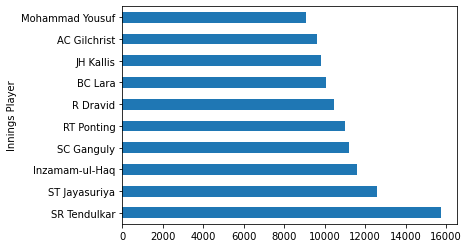

In [295]:
analyse_competition_runs(df,'SC Ganguly')

list of top 10 run getters :
 Innings Player
KC Sangakkara       11805
V Kohli             10232
MS Dhoni            9999 
TM Dilshan          9897 
AB de Villiers      9427 
DPMD Jayawardene    8621 
HM Amla             7696 
MJ Clarke           7654 
RG Sharma           7454 
LRPL Taylor         7433 
Name: Innings Runs Scored Num, dtype: int32


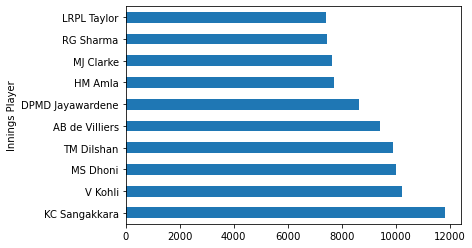

In [296]:
analyse_competition_runs(df,'MS Dhoni')

#### Runs scored over the years in era:

In [297]:
df_Ganguly.groupby(['year'])['Innings Runs Scored Num'].sum()

year
1992    3   
1996    269 
1997    1338
1998    1328
1999    1767
2000    1579
2001    813 
2002    1114
2003    756 
2004    947 
2005    187 
2007    1120
Name: Innings Runs Scored Num, dtype: int32

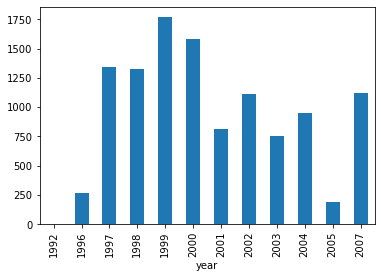

In [298]:
df_Ganguly.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')
plt.show()

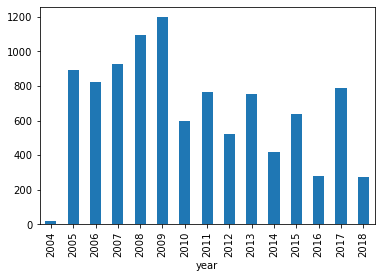

In [299]:
df_Dhoni.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')
plt.show()

### Some more KPIs:

* #### Number of matches to score a 100
* #### Number of matches to score a 50

In [300]:
# (no of matches by player/ no of 100 by player)/(no of matches by others/ no of 100 by others)

In [301]:
def calculate_other_kpis(df, player_name):
    
    if player_name == 'SC Ganguly':
        df_era = df[(df.year >= 1992) & (df.year <= 2008)]
    elif player_name == 'MS Dhoni':
        df_era = df[(df.year >= 2004) & (df.year <= 2018)]
    
    df_player = df_era[df_era['Innings Player'] == player_name]
    df_others = df_era[df_era['Innings Player'] != player_name]

    n_100 = len(df_player)/df_player["100's"].sum()
    print('No. of matches to score a 100: ',np.round(n_100))
    n_50 = len(df_player)/df_player["50's"].sum()
    print('No. of matches to score a 50: ',np.round(n_50))
    
    n_100_others = len(df_others)/df_others["100's"].sum()
    n_50_others = len(df_others)/df_others["50's"].sum()
    
    rel_n_100 = np.round(n_100/n_100_others,2)
    rel_n_50 = np.round(n_50/n_50_others,2)

    print("Normalized score - no. of matches per 100: ", rel_n_100)
    print("Normalized score - no. of matches per 50: ", rel_n_50)

In [302]:
calculate_other_kpis(df, 'SC Ganguly')

No. of matches to score a 100:  14.0
No. of matches to score a 50:  4.0
Normalized score - no. of matches per 100:  0.3
Normalized score - no. of matches per 50:  0.51


In [303]:
calculate_other_kpis(df, 'MS Dhoni')

No. of matches to score a 100:  31.0
No. of matches to score a 50:  4.0
Normalized score - no. of matches per 100:  0.97
Normalized score - no. of matches per 50:  0.53


In [304]:
x1 = df_Ganguly['Opposition'].value_counts().reset_index()
x1.columns= ['opposition', 'SC Ganguly']
x1

,opposition,SC Ganguly
0,v Pakistan,50
1,v Sri Lanka,40
2,v Zimbabwe,36
3,v Australia,33
4,v New Zealand,31
5,v South Africa,29
6,v West Indies,27
7,v England,26
8,v Kenya,10
9,v Bangladesh,10


In [305]:
x2 = df_Dhoni['Opposition'].value_counts().reset_index()
x2.columns= ['opposition', 'MS Dhoni']
x2

,opposition,MS Dhoni
0,v Sri Lanka,53
1,v England,43
2,v Australia,41
3,v West Indies,32
4,v South Africa,31
5,v Pakistan,30
6,v New Zealand,23
7,v Bangladesh,16
8,v Zimbabwe,3
9,v Hong Kong,2


In [306]:
d = pd.merge(x1, x2,on= 'opposition')
d

,opposition,SC Ganguly,MS Dhoni
0,v Pakistan,50,30
1,v Sri Lanka,40,53
2,v Zimbabwe,36,3
3,v Australia,33,41
4,v New Zealand,31,23
5,v South Africa,29,31
6,v West Indies,27,32
7,v England,26,43
8,v Bangladesh,10,16
9,v Netherlands,1,1


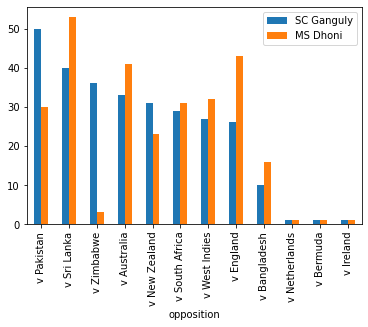

In [307]:
d.set_index('opposition').plot(kind = 'bar')

In [311]:
x1 = df_Ganguly['Innings Runs Scored Buckets'].value_counts().reset_index()
x2 = df_Dhoni['Innings Runs Scored Buckets'].value_counts().reset_index()

x1.columns= ['buckets', 'SC Ganguly']
x2.columns= ['buckets', 'MS Dhoni']

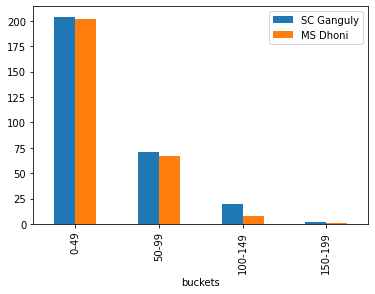

In [312]:
d = pd.merge(x1,x2)
d.set_index('buckets').plot(kind = 'bar')